# Filtering, String Methods, Grouping and Visualizing Data

Son Huynh
31.01.2020

Deadline: **11:59pm 28.02** (Friday)

Submit link: https://www.dropbox.com/request/ZvBWoQUCy8pwRVxQxwJx

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
cars = pd.read_csv('cars.csv')

# remove dollar sign and convert text to number
cars.MSRP = cars.MSRP.str.replace('$', '')
cars.MSRP = cars.MSRP.astype(int)

cars.columns = cars.columns.str.replace(' ', '') # remove white space in column name

cars.head(3)

,Make,Type,Model,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,SUV,MDX,Asia,All,36945,3.5,6.0,265,17,23,4451.0,106.0,189.0
1,Acura,Sedan,RSX Type S 2dr,Asia,Front,23820,2.0,4.0,200,24,31,2778.0,101.0,172.0
2,Acura,Sedan,TSX 4dr,Asia,Front,26990,2.4,4.0,200,22,29,3230.0,105.0,183.0


### Filtering

In [3]:
# Select cars with Weight bigger than 6000 OR smaller than 2000
cars[(cars["Weight"]<2000)&(cars["Weight"]>6000)]

,Make,Type,Model,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length


In [4]:
# Select cars that have 8 to 12 cylinders
cars[cars.Cylinders.between(8,12)]

,Make,Type,Model,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
17,Audi,Sedan,A6 4.2 Quattro 4dr,Europe,All,49690,4.2,8.0,300,17,24,4024.0,109.0,193.0
18,Audi,Sedan,A8 L Quattro 4dr,Europe,All,69190,4.2,8.0,330,17,24,4399.0,121.0,204.0
19,Audi,Sedan,S4 Quattro 4dr,Europe,All,48040,4.2,8.0,340,14,20,3825.0,NaN,179.0
20,Audi,Sports,RS 6 4dr,Europe,Front,84600,4.2,8.0,450,15,22,4024.0,109.0,191.0
25,Audi,Wagon,S4 Avant Quattro,Europe,All,49090,4.2,8.0,340,15,21,3936.0,104.0,179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,Toyota,SUV,Land Cruiser,Asia,All,54765,4.7,8.0,325,13,17,5390.0,NaN,193.0
410,Volkswagen,Sedan,Passat W8 4MOTION 4dr,Europe,Front,39235,4.0,8.0,270,18,25,3953.0,106.0,185.0
411,Volkswagen,Sedan,Phaeton 4dr,Europe,Front,65000,4.2,8.0,335,16,22,5194.0,118.0,204.0
412,Volkswagen,Sedan,Phaeton W12 4dr,Europe,Front,75000,6.0,12.0,420,12,19,5399.0,118.0,204.0


In [5]:
# Select Mazda and Honda cars with Length longer than 180 inches
cars[(cars["Make"]=="Mazda")&(cars["Length"]>180)|(cars["Make"]=="Honda")&(cars["Length"]>180)]

,Make,Type,Model,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
151,Honda,SUV,Pilot LX,Asia,All,27560,3.5,6.0,240,17,22,4387.0,106.0,188.0
157,Honda,Sedan,Accord LX 2dr,Asia,Front,19860,2.4,4.0,160,26,34,2994.0,105.0,188.0
158,Honda,Sedan,Accord EX 2dr,Asia,Front,22260,2.4,4.0,160,26,34,3047.0,105.0,188.0
161,Honda,Sedan,Accord LX V6 4dr,Asia,Front,23760,3.0,6.0,240,21,30,3349.0,108.0,190.0
162,Honda,Sedan,Accord EX V6 2dr,Asia,Front,26960,3.0,6.0,240,21,30,3294.0,105.0,188.0
163,Honda,Sedan,Odyssey LX,Asia,Front,24950,3.5,6.0,240,18,25,4310.0,118.0,201.0
164,Honda,Sedan,Odyssey EX,Asia,Front,27450,3.5,6.0,240,18,25,4365.0,118.0,201.0
243,Mazda,Sedan,Mazda6 i 4dr,Asia,Front,19270,2.3,4.0,160,24,32,3042.0,105.0,187.0
244,Mazda,Sedan,MPV ES,Asia,Front,28750,3.0,6.0,200,18,25,3812.0,112.0,188.0
249,Mazda,Truck,B2300 SX Regular Cab,Asia,Rear,14840,2.3,4.0,143,24,29,2960.0,112.0,188.0


In [8]:
# Select all except cars of sedan type
cars[~(cars["Type"] == "Sedan")]

,Make,Type,Model,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,SUV,MDX,Asia,All,36945,3.5,6.0,265,17,23,4451.0,106.0,189.0
6,Acura,Sports,NSX coupe 2dr manual S,Asia,Rear,89765,3.2,6.0,290,17,24,3153.0,100.0,174.0
20,Audi,Sports,RS 6 4dr,Europe,Front,84600,4.2,8.0,450,15,22,4024.0,109.0,191.0
21,Audi,Sports,TT 1.8 convertible 2dr (coupe),Europe,Front,35940,1.8,4.0,180,20,28,3131.0,95.0,159.0
22,Audi,Sports,TT 1.8 Quattro 2dr (convertible),Europe,All,37390,1.8,4.0,225,20,28,2921.0,96.0,159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,Volkswagen,Wagon,Passat GLS 1.8T,Europe,Front,24955,1.8,4.0,170,22,31,3338.0,106.0,184.0
415,Volkswagen,Wagon,Passat W8,Europe,Front,40235,4.0,8.0,270,18,25,4067.0,106.0,184.0
416,Volvo,SUV,XC90 T6,Europe,All,41250,2.9,6.0,268,15,20,4638.0,113.0,189.0
426,Volvo,Wagon,V40,Europe,Front,26135,1.9,4.0,170,22,29,2822.0,101.0,180.0


In [19]:
# Select only Lexus cars, then calculate the percentage of SUVs among Lexus cars (try using loc)
len(cars[(cars.Make == "Lexus") & (cars.Type == "SUV")])/len(cars[cars.Make == "Lexus"])

0.2727272727272727

### String Methods

In [20]:
# Select cars containing 'convertible' in the model name
cars[cars.Model.str.contains("convertible")]

,Make,Type,Model,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
8,Audi,Sedan,A41.8T convertible 2dr,Europe,Front,35940,1.8,4.0,170,23,30,3638.0,105.0,180.0
14,Audi,Sedan,A4 3.0 convertible 2dr,Europe,Front,42490,3.0,6.0,220,20,27,3814.0,105.0,180.0
15,Audi,Sedan,A4 3.0 Quattro convertible 2dr,Europe,All,44240,3.0,6.0,220,18,25,4013.0,105.0,180.0
21,Audi,Sports,TT 1.8 convertible 2dr (coupe),Europe,Front,35940,1.8,4.0,180,20,28,3131.0,95.0,159.0
22,Audi,Sports,TT 1.8 Quattro 2dr (convertible),Europe,All,37390,1.8,4.0,225,20,28,2921.0,96.0,159.0
23,Audi,Sports,TT 3.2 coupe 2dr (convertible),Europe,All,40590,3.2,6.0,250,21,29,3351.0,96.0,159.0
30,BMW,Sedan,325Ci convertible 2dr,Europe,Rear,37995,2.5,6.0,184,19,27,3560.0,107.0,177.0
36,BMW,Sedan,330Ci convertible 2dr,Europe,Rear,44295,3.0,6.0,225,19,28,3616.0,107.0,177.0
42,BMW,Sports,M3 convertible 2dr,Europe,Rear,56595,3.2,6.0,333,16,23,3781.0,108.0,177.0
43,BMW,Sports,Z4 convertible 2.5i 2dr,Europe,Rear,33895,2.5,6.0,184,20,28,2932.0,NaN,161.0


In [21]:
# Select cars where the model name ends with 2dr
cars[cars.Model.str.endswith("2dr")]

,Make,Type,Model,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
1,Acura,Sedan,RSX Type S 2dr,Asia,Front,23820,2.0,4.0,200,24,31,2778.0,101.0,172.0
8,Audi,Sedan,A41.8T convertible 2dr,Europe,Front,35940,1.8,4.0,170,23,30,3638.0,105.0,180.0
14,Audi,Sedan,A4 3.0 convertible 2dr,Europe,Front,42490,3.0,6.0,220,20,27,3814.0,105.0,180.0
15,Audi,Sedan,A4 3.0 Quattro convertible 2dr,Europe,All,44240,3.0,6.0,220,18,25,4013.0,105.0,180.0
29,BMW,Sedan,325Ci 2dr,Europe,Rear,30795,2.5,6.0,184,20,29,3197.0,107.0,177.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,Toyota,Sports,MR2 Spyder convertible 2dr,Asia,Rear,25130,1.8,4.0,138,26,32,2195.0,97.0,153.0
405,Volkswagen,Sedan,New Beetle GLS 1.8T 2dr,Europe,Front,21055,1.8,4.0,150,24,31,2820.0,99.0,161.0
407,Volkswagen,Sedan,New Beetle GLS convertible 2dr,Europe,Front,23215,2.0,4.0,115,24,30,3082.0,99.0,161.0
423,Volvo,Sedan,C70 LPT convertible 2dr,Europe,Front,40565,2.4,5.0,197,21,28,3450.0,105.0,186.0


In [23]:
# Select cars where the model name has more than 4 words. Hint: words are separated by space.
cars[cars.Model.str.count(" ")>3]

,Make,Type,Model,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
6,Acura,Sports,NSX coupe 2dr manual S,Asia,Rear,89765,3.2,6.0,290,17,24,3153.0,100.0,174.0
10,Audi,Sedan,A4 3.0 Quattro 4dr manual,Europe,All,33430,3.0,6.0,220,17,26,3583.0,104.0,179.0
11,Audi,Sedan,A4 3.0 Quattro 4dr auto,Europe,All,34480,3.0,6.0,220,18,25,3627.0,104.0,179.0
15,Audi,Sedan,A4 3.0 Quattro convertible 2dr,Europe,All,44240,3.0,6.0,220,18,25,4013.0,105.0,180.0
16,Audi,Sedan,A6 2.7 Turbo Quattro 4dr,Europe,All,42840,2.7,6.0,250,18,25,3836.0,109.0,192.0
21,Audi,Sports,TT 1.8 convertible 2dr (coupe),Europe,Front,35940,1.8,4.0,180,20,28,3131.0,95.0,159.0
22,Audi,Sports,TT 1.8 Quattro 2dr (convertible),Europe,All,37390,1.8,4.0,225,20,28,2921.0,96.0,159.0
23,Audi,Sports,TT 3.2 coupe 2dr (convertible),Europe,All,40590,3.2,6.0,250,21,29,3351.0,96.0,159.0
117,Dodge,Truck,Ram 1500 Regular Cab ST,USA,Rear,20215,3.7,6.0,215,16,21,4542.0,121.0,208.0
131,Ford,Sedan,Crown Victoria LX Sport 4dr,USA,Rear,30315,4.6,8.0,239,17,25,4057.0,115.0,212.0


In [27]:
# Change the strings in the Model column to uppercase. Modify the Model column directly.
cars.Model=cars.Model.str.upper()
cars.Model

0                          MDX
1               RSX TYPE S 2DR
2                      TSX 4DR
3                       TL 4DR
4                   3.5 RL 4DR
                ...           
423    C70 LPT CONVERTIBLE 2DR
424    C70 HPT CONVERTIBLE 2DR
425                 S80 T6 4DR
426                        V40
427                       XC70
Name: Model, Length: 428, dtype: object

### Groupby

In [34]:
# Group the data by Origin and calculate the mean for all columns
cars.groupby("Origin").mean()

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
Origin,,,,,,,,,
Asia,24741.322785,2.774051,5.185897,190.702532,22.012658,28.265823,3336.843137,105.812903,182.882353
Europe,48349.796748,3.206504,6.235772,251.894309,18.731707,26.008130,3681.622951,106.592920,181.852459
USA,28377.442177,3.642857,6.108844,212.823129,19.074830,26.013605,3788.489510,112.231884,194.167832


In [43]:
# Group the data by Make and then by Type. What's the cheapest price for a Volvo's SUV?
cars.groupby(["Make","Type"]).min()

Model  Origin DriveTrain   MSRP  \
Make       Type                                                        
Acura      SUV                         MDX    Asia        All  36945   
           Sedan                3.5 RL 4DR    Asia      Front  23820   
           Sports   NSX COUPE 2DR MANUAL S    Asia       Rear  89765   
Audi       Sedan               A4 1.8T 4DR  Europe        All  25940   
           Sports                 RS 6 4DR  Europe        All  35940   
...                                    ...     ...        ...    ...   
Volkswagen Sedan              GOLF GLS 4DR  Europe      Front  18715   
           Wagon                  JETTA GL  Europe      Front  19005   
Volvo      SUV                     XC90 T6  Europe        All  41250   
           Sedan   C70 HPT CONVERTIBLE 2DR  Europe        All  25135   
           Wagon                       V40  Europe        All  26135   

                   EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  \
Make       Type                                                               
Acura      SUV            3.5        6.0         265        17           23   
           Sedan          2.0        4.0         200        18           24   
           Sports         3.2        6.0         290        17           24   
Audi       Sedan          1.8        4.0         170        14           20   
           Sports         1.8        4.0         180        15           22   
...                       ...        ...         ...       ...          ...   
Volkswagen Sedan          1.8        4.0         100        12           19   
           Wagon          1.8        4.0         115        18           25   
Volvo      SUV            2.9        6.0         268        15           20   
           Sedan          1.9        4.0         170        18           25   
           Wagon          1.9        4.0         170        20           27   

                   Weight  Wheelbase  Length  
Make       Type                               
Acura      SUV     4451.0      106.0   189.0  
           Sedan   2778.0      101.0   172.0  
           Sports  3153.0      100.0   174.0  
Audi       Sedan   3252.0      104.0   179.0  
           Sports  2921.0       95.0   159.0  
...                   ...        ...     ...  
Volkswagen Sedan   2820.0       99.0   161.0  
           Wagon   3034.0       99.0   174.0  
Volvo      SUV     4638.0      113.0   189.0  
           Sedan   2767.0      101.0   178.0  
           Wagon   2822.0      101.0   180.0  

[114 rows x 12 columns]

In [54]:
# Are Audi cars heavier than the rest of car brands on average?
cars.groupby(cars.Make == 'Audi').mean()

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
Make,,,,,,,,,
False,32285.545232,3.203178,5.793612,214.264059,20.134474,26.892421,3586.809524,108.344473,186.681704
True,43307.894737,3.057895,6.105263,250.789474,18.473684,25.789474,3700.631579,105.176471,181.421053


### (Optional) Visualization

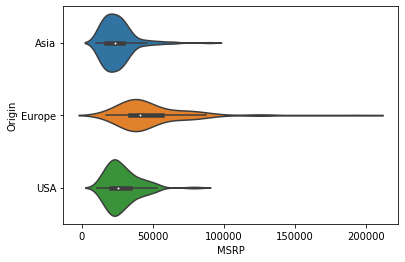

In [66]:
# Use seaborn's violinplot() to plot MSRP by Origin. What can you comment about it?
sns.violinplot(data=cars,x="MSRP",y="Origin")

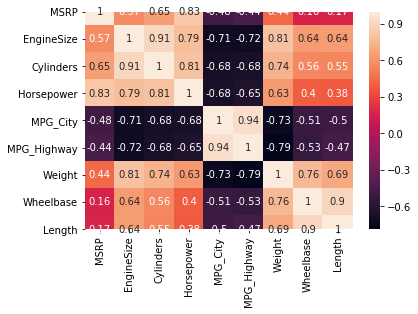

In [69]:
# Use seaborn's heatmap to plot the correlation matrix of cars
sns.heatmap(data=cars.corr(), annot=True)

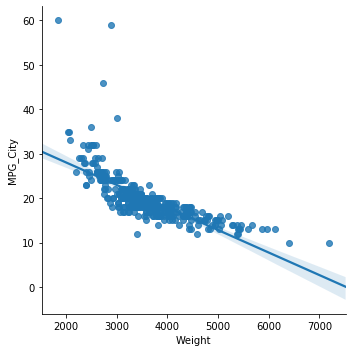

In [70]:
# Use seaborn's lmplot to plot a regression line for Weight and MPG_City. 
# Can you spot a linear relationship?
sns.lmplot(data=cars,x="Weight",y="MPG_City")

Read more about linear regression:
https://towardsdatascience.com/linear-regression-understanding-the-theory-7e53ac2831b5

In [39]:
# Recreate this donut chart.
# You can use plot(kind='pie') to create the chart as an ax. Then use plt.Circle() to create a white circle.
# Finally you can use add_artist() to add the circle to the ax.

![title](pie.png)

Using pie chart is often discouraged. Try making a donut chart, bar chart or treemap instead: https://www.data-to-viz.com/caveat/pie.html

In [38]:
# Group the data by Type and calculate MSRP's mean and Length's max and min.
# Plot a bar chart for MSRP and 2 line charts for max and min lengths.
# All charts should be on the same ax.